# MAA307 Homework Assignment 2

#### Lucien Walewski and Aurele Bohbot

In [3]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

## Exercise 6.11 A

### Part 1

We place ourselves in the framework of Exercise 6.8. We consider the problem
$$
\text{minimize}_{x\in\mathbb{R}^n} \frac{1}{2}\langle Ax,x\rangle - \langle b,x\rangle \quad\text{subject to} \quad Cx=d
$$
where $A\in\mathcal{M}_n(\mathbb{R})$ is symmetric positive definite, $b\in\mathbb{R}^n$, $C\in\mathcal{M}_{m,n}(\mathbb{R})$ is surjective, and $d\in\mathbb{R}^m$. We begin by considering the associated Lagrangian/dual problem given by:
$$
L(x, \lambda) = \frac{1}{2}\langle Ax,x\rangle - \langle b,x\rangle + \langle \lambda,Cx\rangle - \langle \lambda,d\rangle
$$
for $(x,\lambda)\in X\times\mathbb{R}^m$. 

Then, Uzawa's algorithm consists of the following:
\begin{align*}
    x^k\in\argmin_{x\in X} L(x, \lambda^k) \\
    \lambda^{k+1}=\lambda^k+\tau (Cx^k-d)
\end{align*}
We can explicitely compute the update step for $x_k$. We have
\begin{align*}
    x^k\in\argmin_{x\in X} L(x, \lambda^k)&\iff \nabla_x L(x^k, \lambda^k)=0 \\
    &\iff Ax^k-b+C^t\lambda^k =0 \\
    &\iff x^k=A^{-1}(b-C^t\lambda^k)
\end{align*}

We now implement the Uzawa algorithm for this problem.

In [126]:
def Uzawa(A, b, C, d, stepsize, tol, max_iter=None):
    # Initialization
    lambda_ = np.zeros(d.shape)
    invA = np.linalg.inv(A)
    x = invA @ (b - C @ lambda_)
    x_history = [x]
    lambda_ = lambda_ + stepsize * (C @ x -d)
    iterations = 1
    while True:
        # Update
        x_new = invA @ (b - C @ lambda_)
        lambda_ = lambda_ + stepsize * (C @ x_new - d)
        x_history.append(x_new)
        iterations += 1
        # Stopping criterion
        if np.linalg.norm(x_new - x) < tol or iterations == max_iter:
            return x_history, lambda_, iterations
        x = x_new

In [127]:
# Example values

A = np.array([[2, 0], [0, 1]]) # Symmetric positive definite
C = np.array([[1,3], [2,1]]) # Surjective
d = np.array([3,1])
b = np.array([2,1])
tau = 0.1
tol = 1e-6

x_history, lambda_, _ = Uzawa(A, b, C, d, tau, tol)
print(f'Given A = {A}, C = {C}, d = {d}, b = {b}, τ = {tau}, tol = {tol}, the solution is {x_history[-1]}')

Given A = [[2 0]
 [0 1]], C = [[1 3]
 [2 1]], d = [3 1], b = [2 1], τ = 0.1, tol = 1e-06, the solution is [4.80550264e-06 9.99996586e-01]


### Convergence

We are given that a sufficient condition for convergence is
$$
    0 < \tau < \frac{2m_A}{M_C}
$$
where $m_A$ is the smallest eigenvalue of $A$ and $M_C$ is the largest eigenvalue of $C^tC$.

In order to demonstrate this condition, we vary $\tau$ and plot the convergence of the algorithm.

In [128]:
def compute_condition(A, C):
    m_A = min(np.linalg.eig(A)[0])
    M_C = max(np.linalg.eig(C.T @ C)[0])
    bound = 2 * m_A / M_C
    return m_A, M_C, bound

m_A, M_C, bound = compute_condition(A, C)

print(f'The smallest eigenvalue of A is {m_A} and the largest eigenvalue of C^tC is {M_C} so the bound is {bound}')

The smallest eigenvalue of A is 1.0 and the largest eigenvalue of C^tC is 13.090169943749475 so the bound is 0.15278640450004205


/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in matmul
  if sys.path[0] == '':
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in subtract
  app.launch_new_instance()
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()


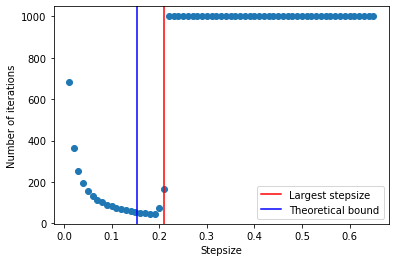

In [129]:
def plot_condition(A, b, C, d, tau, tol, max_iter):
    iterations = []
    stepsizes = []

    for tau in np.arange(0.01, bound + 0.5, 0.01):
        x_history, lambda_, iters = Uzawa(A, b, C, d, tau, tol, max_iter=1000)
        stepsizes.append(tau)
        iterations.append(iters)

    largest_stepsize = stepsizes[np.argmax(np.array(iterations) == 1000) - 1]
    plt.scatter(stepsizes, iterations)
    plt.xlabel('Stepsize')
    plt.ylabel('Number of iterations')
    plt.axvline(largest_stepsize, color='r', label='Largest stepsize')
    plt.axvline(bound, color='b', label='Theoretical bound')
    plt.legend()

plot_condition(A, b, C, d, tau, tol, max_iter=1000)

It can be seen in the scatter graph above that the condition is indeed sufficient but not necessary. We try some more examples to illustrate the condition.

/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in matmul
  if sys.path[0] == '':
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in subtract
  app.launch_new_instance()
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()


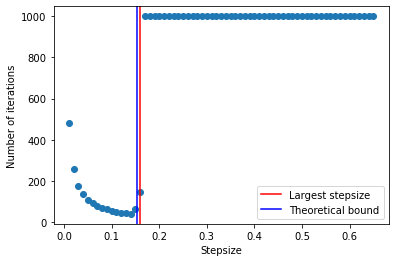

In [130]:
A = np.array([[1, 0], [0, 1]]) # Identity
C = np.array([[1,3], [2,1]]) # Surjective
d = np.array([3,1])
b = np.array([2,1])

plot_condition(A, b, C, d, tau, tol, max_iter=1000)

/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in matmul
  if sys.path[0] == '':
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in matmul
  # This is added back by InteractiveShellApp.init_path()


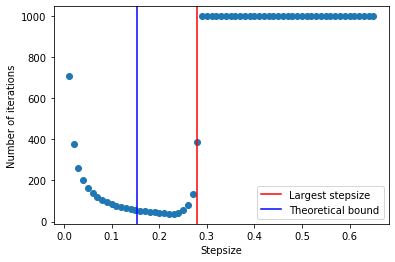

In [131]:
A = np.array([[5, 3], [0, 1]]) # Identity
C = np.array([[1,4], [2,1]]) # Surjective
d = np.array([3,2])
b = np.array([2,4])

plot_condition(A, b, C, d, tau, tol, max_iter=1000)

TODO: Compare with algebraic formulation of 6.8.1

### Part 2

We now implement the augmented Lagrangian method. The augmented Lagrangian of parameter $\beta>0$ for $(x,y)\in E\times Y$ is given by
\begin{align*}
    L_{\beta}(x,\lambda)&= \frac{1}{2}\langle Ax,x\rangle - \langle b,x\rangle + \langle \lambda,Cx-d\rangle + \frac{\beta}{2}\lVert Cx-d\rVert^2
\end{align*}

We derive our new update rules for $x^k$ and $\lambda^k$. We have
\begin{align*}
    x^k\in\argmin_{x\in X} L_{\beta}(x, \lambda^k)&\iff \nabla_x L_{\beta}(x^k, \lambda^k)=0 \\ 
    &\iff Ax^k-b+C^t\lambda^k +\beta C\lVert Cx^k-d\rVert=0 \\
    &\iff x^k=(A+\beta C^tC)^{-1}(b-C^t\lambda^k-\beta C^td)
\end{align*}
as well as
\begin{align*}
    \lambda_{k+1}=\lambda^k+\beta (Cx^k-d)
\end{align*}

We now implement the augmented Lagrangian method.

In [132]:
def uzawa_augmented(A, b, C, d, beta, tol, max_iter=None):
    # Initialization
    lambda_ = np.zeros(d.shape)
    inv = np.linalg.inv(A + beta * C.T @ C)
    x = inv @ (b - C @ lambda_ - beta * C.T @ d)
    x_history = [x]
    lambda_ = lambda_ + beta * (C @ x -d)
    iterations = 1
    while True:
        # Update
        x_new = inv @ (b - C @ lambda_ - beta * C.T @ d)
        lambda_ = lambda_ + beta * (C @ x_new - d)
        iterations += 1
        x_history.append(x_new)
        # Stopping criterion
        if np.linalg.norm(x_new - x) < tol or iterations == max_iter:
            return x_history, lambda_, iterations
        x = x_new

We compare the augmented Lagrangian method with the Uzawa algorithm for the examples previously seen. 

We have seen in Exercise 6.8.1 that we can express a necessary and sufficient optimality condition in the form $Mz=r$. As $C$ is surjective, the Slater constraint qualification is satisfied. We have the existence of $\lambda\in\mathbb{R}^m$ such that
\begin{align*}
    \begin{cases}
        Ax-b+C^t\lambda=0 \\
        Cx=d
    \end{cases}
\end{align*}
which can be written as $Mz=r$ with
\begin{align*}
M=\begin{pmatrix}
    A & C^t \\
    C & 0
    \end{pmatrix},
    \quad
    z=\begin{pmatrix}
    x \\
    \lambda
    \end{pmatrix},
    \quad
    r=\begin{pmatrix}
    b \\
    d
    \end{pmatrix}
\end{align*}

Thus, we can compare our numerical solution with the algebraic solution.

In [154]:
# Finds theoretical solution to problem
def find_sol(A, b, C, d):
    M = np.block([[A, C.T], [C, np.zeros((C.shape[0], C.shape[0]))]])
    r = np.block([b, d])

    z = np.linalg.solve(M, r)
    x = z[:A.shape[0]]
    return x

In [158]:
# Plots error against iteration for Uzawa as well as Uzawa augmented for various betas
def compare_methods(A, b, C, d):
    sol = find_sol(A, b, C, d)
    x_history, lambda_, iters = Uzawa(A, b, C, d, tau, tol=1e-6)
    errors = np.array([np.linalg.norm(x_history[i] - sol) for i in range(len(x_history))])
    plt.figure(figsize=(10,8))
    plt.plot(np.arange(len(errors)), errors, label='Uzawa')
    for beta in [0.1, 0.5, 1, 2]:
        x_aug_history, lambda__aug, iters_aug = uzawa_augmented(A, b, C, d, beta, tol=1e-6)
        errors = np.array([np.linalg.norm(x_aug_history[i] - sol) for i in range(len(x_aug_history))])
        plt.plot(np.arange(len(errors)), errors, label=f'β = {beta}')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.legend()
    plt.show()


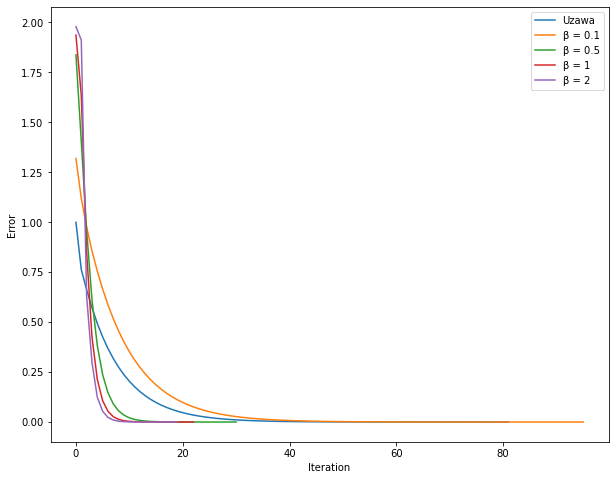

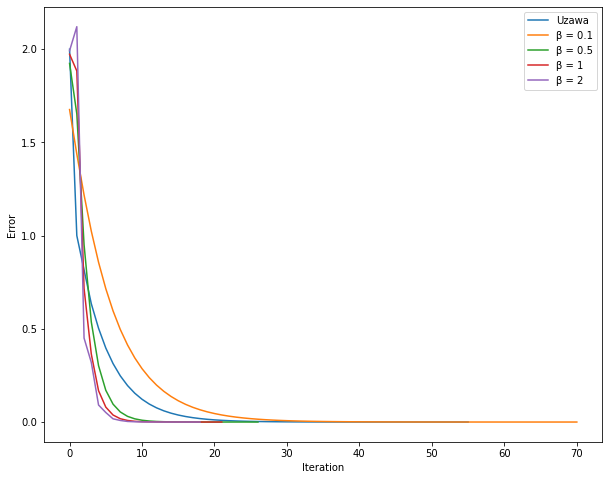

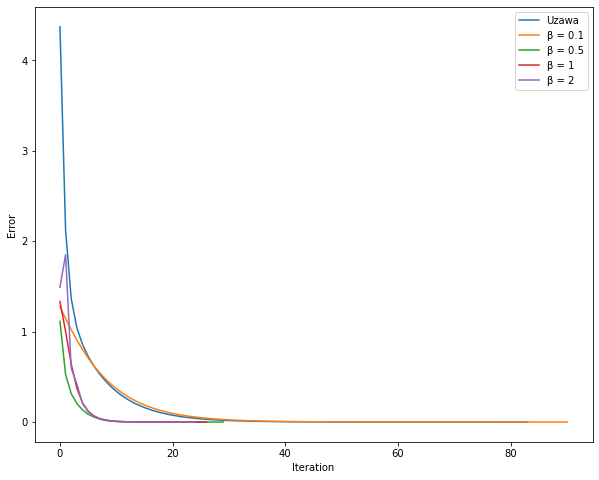

In [159]:
A = np.array([[2, 0], [0, 1]]) # Symmetric positive definite
C = np.array([[1,3], [2,1]]) # Surjective
d = np.array([3,1])
b = np.array([2,1])
tau = 0.1
tol = 1e-6

compare_methods(A, b, C, d)

A = np.array([[1, 0], [0, 1]]) # Identity
C = np.array([[1,3], [2,1]]) # Surjective
d = np.array([3,1])
b = np.array([2,1])

compare_methods(A, b, C, d)

A = np.array([[5, 3], [0, 1]]) # Identity
C = np.array([[1,4], [2,1]]) # Surjective
d = np.array([3,2])
b = np.array([2,4])

compare_methods(A, b, C, d)

We see that for the augmented Lagrangian method, the numerical solution converges much faster than the standard Uzawa algorithm for a "good" choice of $\beta$. 

## Exercise 6.11.B

### Part 1

We place ourselves in the framework of Exercise 6.6 (q1). We consider the problem
$$
\text{minimize}_{x\in\mathbb{R}^n} \frac{1}{2}\langle Ax,x\rangle - \langle b,x\rangle \quad\text{subject to} \quad Cx\leq d
$$
where $A\in\mathcal{M}_n(\mathbb{R})$ is symmetric positive definite, $b\in\mathbb{R}^n$, $C\in\mathcal{M}_{m,n}(\mathbb{R})$ is surjective, and $d\in\mathbb{R}^m$. We begin by considering the associated Lagrangian/dual problem given by:
$$
L(x, \mu) = \frac{1}{2}\langle Ax,x\rangle - \langle b,x\rangle + \langle \mu,Cx\rangle - \langle \mu,d\rangle
$$
for $(x,\mu)\in X\times\mathbb{R}^m$. 

Then, Uzawa's algorithm consists of the following:
\begin{align*}
    x^k\in\argmin_{x\in X} L(x, \mu^k) \\
    \mu^{k+1}=\left(\mu^k+\tau (Cx^k-d)\right)^+
\end{align*}
We can explicitely compute the update step for $x_k$. We have
\begin{align*}
    x^k\in\argmin_{x\in X} L(x, \mu^k)&\iff \nabla_x L(x^k, \mu^k)=0 \\
    &\iff Ax^k-b+C^t\mu^k =0 \\
    &\iff x^k=A^{-1}(b-C^t\mu^k)
\end{align*}

In [15]:
def uzawa_b(A, b, C, d, stepsize, tol, max_iter=None):
    mu0 = np.zeros(d.shape)
    invA = np.linalg.inv(A)
    x = invA @ (b - C @ mu0)
    x_history = [x]
    mu = np.maximum(mu0 + stepsize * (C @ x -d), mu0)
    iterations = 1
    while True:
        # Update
        x_new = invA @ (b - C @ mu)
        mu = np.maximum(mu + stepsize * (C @ x_new - d), mu0)
        x_history.append(x_new)
        iterations += 1
        # Stopping criterion
        if np.linalg.norm(x_new - x) < tol or iterations == max_iter:
            return x_history, mu, iterations
        x = x_new

In [16]:
# Example values
A = np.array([[2, 0], [0, 1]]) # Symmetric positive definite
C = np.array([[1,3], [2,1]]) # Surjective
d = np.array([3,1])
b = np.array([2,1])
tau = 0.1
tol = 1e-6

x_history, mu, _ = uzawa_b(A, b, C, d, tau, tol)
print(f'Given A = {A}, C = {C}, d = {d}, b = {b}, τ = {tau}, tol = {tol}, the solution is {x_history[-1]}')

Given A = [[2 0]
 [0 1]], C = [[1 3]
 [2 1]], d = [3 1], b = [2 1], τ = 0.1, tol = 1e-06, the solution is [0.25000099 0.50000066]


### Part 2

We place ourselves in the framework of Exercise 6.6 (q2). We consider the problem
$$
\text{minimize}_{x\in\mathbb{R}^n} \frac{1}{2}\langle Ax,x\rangle - \langle b,x\rangle \quad\text{subject to} \quad x\geq 0
$$
where $A\in\mathcal{M}_n(\mathbb{R})$ is symmetric positive definite, $b\in\mathbb{R}^n$.

The gradient method algorithm is given by:
\begin{align*}
    x^{k+1} =((I_{n} - \tau A) x^{k} + \tau b)^{+}.
\end{align*}

In [123]:
def gradient_method(x, A, b, tau, tol, max_iter=np.inf):
    n = x.shape[0]
    x_history = [x]
    iterations = 1
    while True:
        # Update
        x_new = np.maximum(x_history[-1]-tau*(A@x_history[-1] - b), np.zeros(n))
        x_history.append(x_new)
        iterations += 1
        # Stopping criterion
        if np.linalg.norm(x_new - x) < tol or iterations > max_iter:
            return x_history, iterations
        x = x_new

In [124]:
# Example values
x0 = np.zeros(2)
A = np.array([[2, 0], [0, 1]]) # Symmetric positive definite
b = np.array([3,1])
tau = 0.1
tol = 1e-6

x_history, _ = gradient_method(x0, A, b, tau, tol)
print(f'Given A = {A}, b = {b}, τ = {tau}, tol = {tol}, the solution is {x_history[-1]}')

Given A = [[2 0]
 [0 1]], b = [3 1], τ = 0.1, tol = 1e-06, the solution is [1.5        0.99999166]


Let us show that if 
\begin{align*}
    0 < \tau < M_A \quad \text{with } M_A \text{ the largest eigen value of } A
\end{align*}
then $x^k$ converges.

Firstly, for $g=0$, the null function we clearly have $g$ convex, proper and lower semi-continuous. In addition, $\text{prox}_{\gamma^{-1}g}$ is the identity mapping, so we have that
\begin{align*}
    \forall \ x \in \mathbb{R}^n, \ \text{prox}_{\gamma^{-1}g}(x) = \{x\},
\end{align*}
which is a singleton.

Furthermore, the function $f$ define by
\begin{align*}
    \forall x \in \mathbb{R}^n,\ f(x) = \frac{1}{2}\langle Ax,x\rangle - \langle b,x\rangle,
\end{align*}
is inf-compact.

Lastly, let us show that $\nabla f$ is $\frac{1}{\tau}$-Lpischitz continuous.

Let $x,y \in \mathbb{R}^n$:
\begin{align*}
    \parallel\nabla f(x)-\nabla f(y)\parallel_n &= \parallel Ax -b -Ay + b)\parallel_n\\
    &= \parallel A(x-y)\parallel_n\\
    &\leq M_A\parallel x-y\parallel_n\\
    &\leq \frac{1}{\tau}\parallel x-y\parallel_n,
\end{align*}
which completes the proof.

From these three assumptions, the proposition 6.4 gives the desired results.

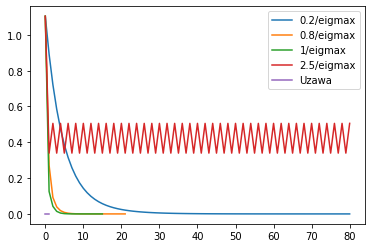

In [155]:
# Graphical illustration
x0 = np.array([1,1])
b = np.array([1,2])
A = np.array([[5,1], [1,6]])
tol = 1e-7
max_iter = 80
eigmax = np.max(np.linalg.eig(A)[0])
  
x1, _ = gradient_method(x0, A, b, 0.2 / eigmax, tol, max_iter)
x2, _ = gradient_method(x0, A, b, 0.8 / eigmax, tol, max_iter)
x3, _ = gradient_method(x0, A, b, 1/eigmax, tol, max_iter)
x4, _ = gradient_method(x0, A, b, 2.5/eigmax, tol, max_iter)

x_sol = uzawa_b(A, b, -np.eye(x0.shape[0]), np.zeros(x0.shape), 0.1, 1e-7)[0]

def get_dist(arr, x_sol):
    dist = []
    for i, _ in enumerate(arr):
        dist.append(np.linalg.norm(arr[i]-x_sol))
    return dist

plt.plot(list(range(len(x1))), get_dist(x1, x_sol[-1]), label='0.2/eigmax')
plt.plot(list(range(len(x2))), get_dist(x2, x_sol[-1]), label='0.8/eigmax')
plt.plot(list(range(len(x3))), get_dist(x3, x_sol[-1]), label='1/eigmax')
plt.plot(list(range(len(x4))), get_dist(x4, x_sol[-1]), label='2.5/eigmax')
plt.plot(list(range(len(x_sol))), get_dist(x_sol, x_sol[-1]), label='Uzawa')
plt.legend()
plt.show()

As we see here, the smallet is $\tau$ the fastest is the convergence, when it is greater than $1/eigmax$, there is no more convergence.

Uzawa performs a lot better.

### Part 3

In the following part, we want to find the projection for some $x_0\in\mathbb{R}^n$ onto
\begin{align*}
    K = \left\{(u_1,\dots, u_n) \in\mathbb{R}^n, \forall i \in \{1, \dots, n-1\}, u_i\leq u_{i+1}\right\}.
\end{align*}

The projection $\hat{x}$ is given by
\begin{align*}
    \hat{x} = \argmin\limits_{x\in K}\frac{1}{2} \parallel x-x_0 \parallel_n^2.
\end{align*}

This yields the following problem
\begin{align*}
    \text{minimize}_{x\in \mathbb{R}^n} \frac{1}{2} \parallel x-x_0 \parallel_n^2 \quad \text{subject to } x\in K.
\end{align*}

We define 
\begin{align*}
    g: (x_1, \dots, x_n) \in \mathbb{R}^n \mapsto (x_1-x_2, \dots, x_{n-1}-x_n)
\end{align*}
and get the following equivalent problem
\begin{align*}
    \text{minimize}_{x\in \mathbb{R}^n} \frac{1}{2} \parallel x-x_0 \parallel_n^2 \quad \text{subject to } g(x)\leq 0.
\end{align*}

Note that defining
\begin{align*}
    A = \begin{pmatrix} 1 & -1 & 0 & \dots & 0 \\
                0 & 1 & -1 & \dots & 0 \\
                \vdots & \ddots & \ddots & \ddots &\vdots \\
                0 & \dots & 0  & 1 & -1 \\
        \end{pmatrix}
\end{align*}
we get
\begin{align*}
    g(x) = Ax.
\end{align*}

Its Lagrangian form is given by:
\begin{align*}
    L(x,\mu) = \frac{1}{2} \parallel x-x_0 \parallel_n^2 + \langle \mu, g(x)\rangle = \frac{1}{2} \parallel x-x_0 \parallel_n^2 + \langle Ax, \mu\rangle
\end{align*}
for $(x, \mu) \in \mathbb{R}^n\times \mathbb{R}^n$.



Then, Uzawa's algorithm consists of the following:
\begin{align*}
    x^k\in\argmin_{x\in X} L(x, \mu^k) \\
    \mu^{k+1}=\left(\mu^k+\tau g(x^k)\right)^+
\end{align*}
We can explicitely compute the update step for $x_k$. We have
\begin{align*}
    x^k\in\argmin_{x\in X} L(x, \mu^k)&\iff \nabla_x L(x^k, \mu^k)=0 \\
    &\iff (x^k-x_0) + \mu^T A= 0 \\
    &\iff x^k=x_0 - \mu^T A.
\end{align*}

In [66]:
def uzawa_proj(x_0, tol, tau, max_iter=np.inf):
    A = np.array([[1, -1]])
    mu0 = np.array([[0]])
    x = x_0 - mu0.T @ A
    x_history = [x]
    mu = np.maximum(mu0 + tau * (A@x.T), mu0)
    iterations = 1
    while True:
        # Update
        x_new = x_0 - mu.T @ A
        mu = np.maximum(mu + tau * (A@x.T), mu0)
        x_history.append(x_new)
        iterations += 1
        # Stopping criterion
        if np.linalg.norm(x_new - x) < tol or iterations == max_iter:
            return x_history, mu, iterations
        x = x_new

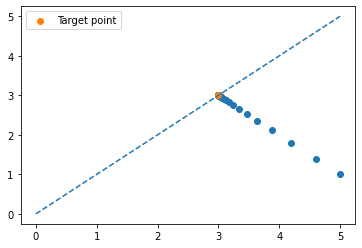

In [76]:
# Example values
x_0 = np.array([[5,1]])
tau = 0.1
tol = 1e-6

x_history, mu, _ = uzawa_proj(x_0, tol, tau, 100)
x_coor = [x[0,0] for x in x_history]
y_coor = [x[0,1] for x in x_history]
plt.scatter(x_coor, y_coor)
plt.scatter(3,3, label='Target point')
plt.plot(list(range(6)), list(range(6)), linestyle='--')
plt.legend()
plt.show()

Aurèle Bohbot & Lucien Walewski